In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
%cd '/content/gdrive/My Drive/PDEU/Pattern recognition and machine learning/data'

/content/gdrive/My Drive/PDEU/Pattern recognition and machine learning/data


In [4]:
k = 2

##**Date preparation**

In [5]:
df = pd.read_csv('wine.data', header=None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
              'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
              'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
X = np.array(df.drop(["Class label"], axis=1))
Y = df["Class label"]

In [7]:
n_features = X.shape[1]
class_labels = np.unique(Y)

##**Train-Test Split**

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=0)

##**Standardization**

In [9]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

##**Calculate $S_w$ and $S_b$**

In [10]:
mean = np.mean(X_train_std, axis=0).reshape(n_features,1)

In [11]:
SW = np.zeros((n_features, n_features))
SB = np.zeros((n_features, n_features))

for c in class_labels:
  X_c = X_train_std[Y_train==c]
  Nc = X_c.shape[0]

  Mc = np.mean(X_c, axis=0).reshape(n_features,1)

  SW += np.dot((X_c.T - Mc), (X_c.T - Mc).T)
  SB += Nc*np.dot((mean - Mc), (mean - Mc).T)

##**Solve $S_w^{-1}S_b$**

In [12]:
A = np.dot(np.linalg.inv(SW), (SB))

In [13]:
eigval, eigvec = np.linalg.eig(A)
eigvec = eigvec.T

In [14]:
eigvec = eigvec[np.argsort(eigval)[::-1]]
eigval = eigval[np.argsort(eigval)[::-1]]

##**Discriminality**

In [15]:
total_dis = 0

dis = []
for i in range(13):
  total_dis += eigval[i]
  dis.append(eigval[i])

In [16]:
dis = np.array(dis)
dis = (dis/total_dis)*100

cum_dis = np.cumsum(dis)

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


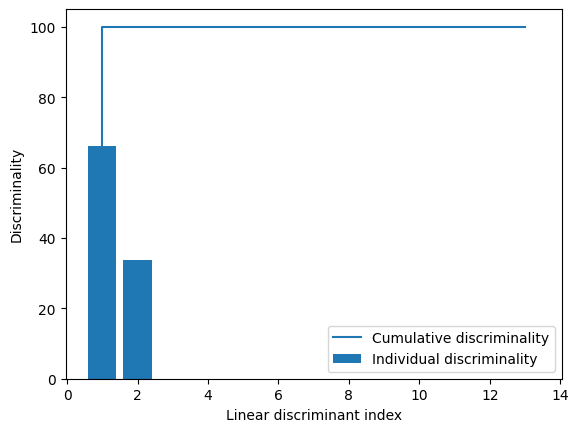

In [17]:
plt.bar(range(1,14), dis, label="Individual discriminality")
plt.step(range(1,14), cum_dis, label="Cumulative discriminality")

plt.xlabel("Linear discriminant index")
plt.ylabel("Discriminality")

plt.legend(loc="best")
plt.show()

##**Perform LDA**

In [18]:
W = eigvec[:2]
W = np.array(W)

In [19]:
print(W)

[[-0.15856101+0.j  0.0983994 +0.j -0.01555015+0.j  0.15877745+0.j
  -0.02070903+0.j  0.18843457+0.j -0.71526798+0.j -0.07975655+0.j
   0.00742877+0.j  0.34478986+0.j -0.02540103+0.j -0.31916168+0.j
  -0.40542991+0.j]
 [-0.40770012+0.j -0.18214518+0.j -0.34732562+0.j  0.30951627+0.j
  -0.06395442+0.j  0.07330708+0.j  0.30343998+0.j -0.00093295+0.j
   0.07163746+0.j -0.28077018+0.j  0.24395637+0.j -0.04592015+0.j
  -0.58055177+0.j]]


In [20]:
X_hat_train = np.dot(X_train_std, W.T)
X_hat_test = np.dot(X_test_std, W.T)

##**Plot results**

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


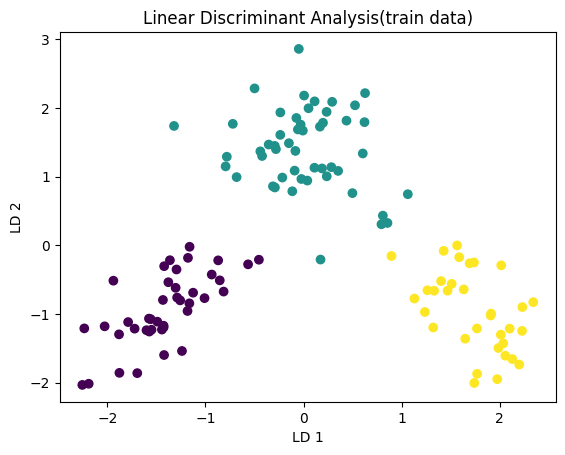

In [21]:
scatter = plt.scatter(X_hat_train[:, 0], X_hat_train[:, 1], c=Y_train)

plt.title("Linear Discriminant Analysis(train data)")
plt.xlabel("LD 1")
plt.ylabel("LD 2")

plt.show()

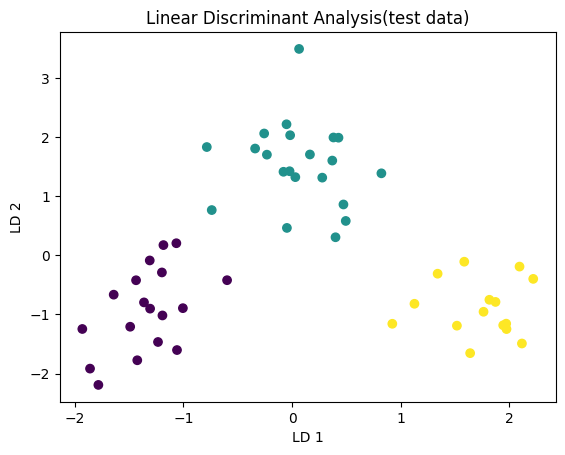

In [22]:
scatter = plt.scatter(X_hat_test[:, 0], X_hat_test[:, 1], c=Y_test)

plt.title("Linear Discriminant Analysis(test data)")
plt.xlabel("LD 1")
plt.ylabel("LD 2")

plt.show()